In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from influxdb import InfluxDBClient

In [2]:
class Measure:
    temperature = 0
    humidity = 0

In [3]:
def get_moisture(alias):
    results = client.query('select last("Moisture") from "Flowers" where alias = \'' + alias + '\'')
    return results.raw['series'][0]['values'][0][1]

In [4]:
def get_measure(alias):
    results = client.query('select last("Temperature") as temperature,last( "Humidity") as humidity from Telemetry where alias = \'' + alias + '\'')
    measure = Measure()
    measure.temperature = results.raw['series'][0]['values'][0][1]
    measure.humidity = results.raw['series'][0]['values'][0][2]
    
    return measure

In [5]:
def getLevelIcon(level):
    if level < 10:
        return levelIcons[0]
    elif level < 13:
        return levelIcons[1]
    elif level < 16:
        return levelIcons[2]    
    elif level < 19:
        return levelIcons[3]
    else:
        return levelIcons[4]

In [6]:
def humidity_color(humidity):
    if humidity < 40 or humidity > 60:
        return 'red'
    else:
        return 'black'

In [7]:
client = InfluxDBClient(host='192.168.13.30', port=8086)

In [8]:
client.switch_database('garden')

In [9]:
workRoom = get_measure('workRoomTempSensor')
livRoom = get_measure('livRoomTempSensor')
SashaRoom = get_measure('SashaRoomTempSensor')
bedRoom = get_measure('bedRoomTempSensor')

In [10]:
oleandrMoisture = get_moisture('flowerOleandrSensor')
olivaMoisture = get_moisture('flowerOlivaSensor')

In [11]:
temperature = [workRoom.temperature, bedRoom.temperature, livRoom.temperature, SashaRoom.temperature]
humidity = [workRoom.humidity, bedRoom.humidity, livRoom.humidity, SashaRoom.humidity]
flowers = [oleandrMoisture, olivaMoisture]

In [12]:
fntName = "fonts/HelveticaNeueCyr-Medium.ttf"
fnt = ImageFont.truetype(fntName, 80)
fntHeader = ImageFont.truetype(fntName, 20)

In [13]:
humidityIcon = Image.open('images/humidity.png', 'r')
temperatureIcon = Image.open('images/temperature.png', 'r')
oliveIcon = Image.open('images/olive.png', 'r')
oleandrIcon = Image.open('images/oleandr.png', 'r')

levelIcons = [Image.open('images/level1.png', 'r'), Image.open('images/level2.png', 'r'), Image.open('images/level3.png', 'r'), Image.open('images/level4.png', 'r'), Image.open('images/level5.png', 'r')]

In [14]:
size = (880, 528)
cornersLeft = [(18, 20), (305, 20), (592, 20), (18, 274), (305, 274), (592, 274)]
cardSize = (270, 234)
headerSize = (190, 30)

In [15]:
img = Image.new('RGB', size, color = 'white')
draw = ImageDraw.Draw(img)

In [16]:
draw.rectangle([(0,0), (879, 527)], fill = 'white', outline = 'black')

for i in range(6):
    draw.rectangle([cornersLeft[i], tuple(np.add(cornersLeft[i], cardSize))], fill = 'white', outline = 'black')
    draw.rectangle([tuple(np.add(cornersLeft[i], (70, 0))), tuple(np.add(cornersLeft[i], headerSize))], fill = 'white', outline = 'black')
    
for i in range(4):
    img.paste(temperatureIcon, tuple(np.add(cornersLeft[i], (41, 59))))
    img.paste(humidityIcon, tuple(np.add(cornersLeft[i], (38, 144))))

img.paste(oleandrIcon, tuple(np.add(cornersLeft[4], (3, 62))))
img.paste(oliveIcon, tuple(np.add(cornersLeft[5], (3, 62))))

In [17]:
draw.text(tuple(np.add(cornersLeft[0], (85, 7))), 'КАБИНЕТ', font = fntHeader, fill = 'black')
draw.text(tuple(np.add(cornersLeft[1], (82, 7))), 'СПАЛЬНЯ', font = fntHeader, fill = 'black')
draw.text(tuple(np.add(cornersLeft[2], (108, 7))), 'ЗАЛ', font = fntHeader, fill = 'black')
draw.text(tuple(np.add(cornersLeft[3], (87, 7))), 'ПЕЩЕРА', font = fntHeader, fill = 'black')
draw.text(tuple(np.add(cornersLeft[4], (82, 7))), 'ОЛЕАНДР', font = fntHeader, fill = 'black')
draw.text(tuple(np.add(cornersLeft[5], (93, 7))), 'ОЛИВА', font = fntHeader, fill = 'black')

In [18]:
img.paste(getLevelIcon(flowers[0]), tuple(np.add(cornersLeft[4], (145, 87))))
img.paste(getLevelIcon(flowers[1]), tuple(np.add(cornersLeft[5], (145, 87))))

for i in range(4):
    draw.text(tuple(np.add(cornersLeft[i], (140, 62))), '{:2.0f}'.format(temperature[i]), font = fnt, fill = 'black')
    draw.text(tuple(np.add(cornersLeft[i], (140, 147))), '{:2.0f}'.format(humidity[i]), font = fnt, fill = humidity_color(humidity[i]))

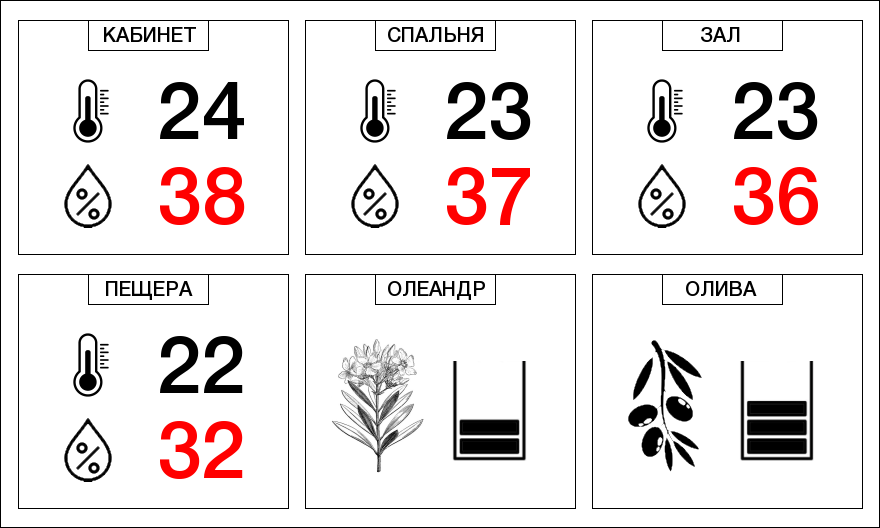

In [19]:
display(img)